
# "cccc"
> "Awesome summary"

- toc: true
- badges: false
- comments: false
- author: Jade
- categories: [fastpages, jupyter]

In [ ]:
#import libraries
#the dataset: Amazon Fine Food Reviews
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import datetime as dt
import datetime
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Import the data set 

In [2]:
#import dataset
df = pd.read_csv('Reviews.csv')

In [3]:
#see the sample of dataset
df.sample(100000)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
440484,440485,B002ZOCEMG,A5SO1DV5DD508,Josie,2,3,5,1274313600,Best ground coffee,I have a one cup coffee brewer that uses pods ...
364261,364262,B0045WW53O,A27S2MBCDO13C2,dandy,1,2,2,1298073600,weak...,I love chocolate - all chocolate. These discs...
428237,428238,B0002DHQ7A,A257380K6T948T,"Doesitmatter ""Sam""",1,1,5,1289865600,Want to see your kitten go bezerk?,I will come straight out and say that kookamun...
2555,2556,B000ED9LDU,A2S9PYHE7RN1D9,Binoy Shah,1,1,5,1307404800,Great stuff,Bought this as a way to take in omega 3 nutrie...
23051,23052,B004ZIER34,A1W415JP5WEAJK,Roberta Karchner,0,0,4,1313193600,Did not upset my stomach ...,I have gastritis ... and the very first thing ...
...,...,...,...,...,...,...,...,...,...,...
24186,24187,B0013NUGDE,AJXA1LEPPNFW4,MindSpeaksFree,2,6,1,1289433600,Not great,My family and I enjoy the salt & vinegar chips...
46040,46041,B001EO5QZK,A1S7MC961R4WE4,Ash,2,5,3,1167868800,Not Strong enough,The tea is Ok but if you like your tea strong ...
443105,443106,B000G176AK,A3EBHHCZO6V2A4,"Amaranth ""music fan""",4,4,3,1221091200,Under the Tuscan Sun,Amy's Tuscan Bean and Rice Soup is an attempt ...
274928,274929,B00141OY4W,AVNN3RB8S85ZX,"R. Phillips ""Rusty""",1,1,5,1244160000,great alternative to biscuits,I was thrilled to find these for our three lab...


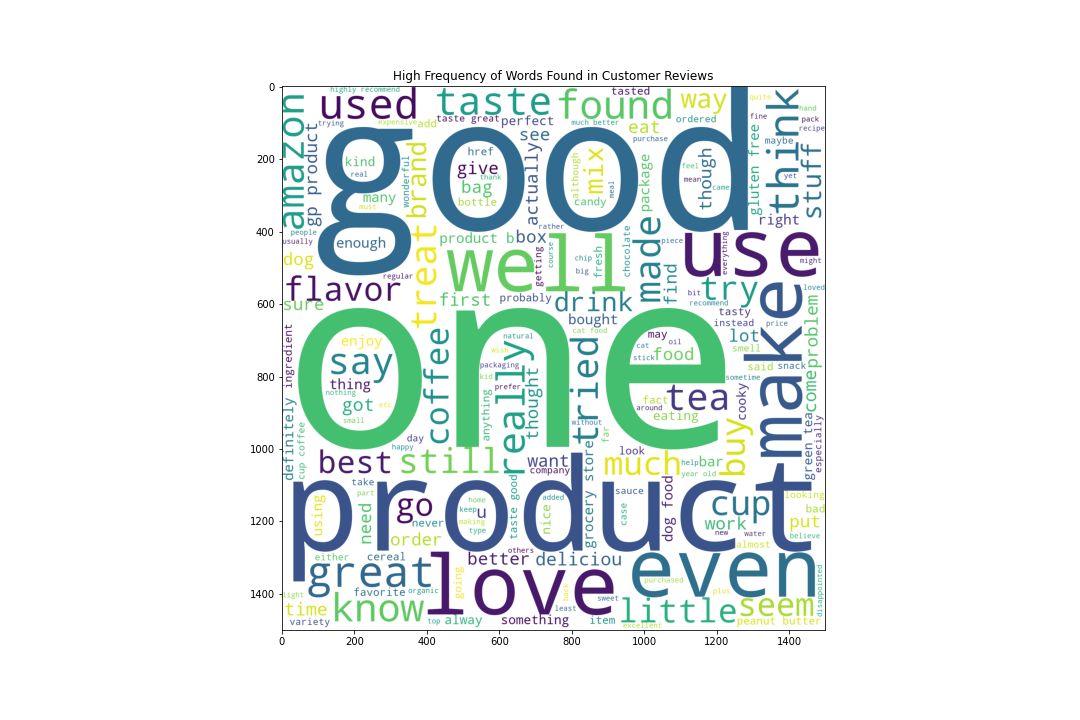

# Reshape and Explore Data

Initially, we need to explore the landscape of our data first and make a decision to selecte only essential attributes. Also, we can perform visualization in order to understand our data more.

In [4]:
#get the column name using list comprehension
print([col for col in df])  

['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']


In [5]:
#dataset is too large and it requires more resources to utilize all dataset
#dislaimer: in this project, I will used only one-fifth of the dataset
df.shape 

(568454, 10)

In [6]:
df0 = df.sample(frac = 0.20) # taking 20% of dataset
df0 = df0[['Id','ProfileName','Score', 'Time', 'Summary', 'Text']] # query only some attribute
df0.head()


,Id,ProfileName,Score,Time,Summary,Text
314955,314956,Ricky M. Siebold,5,1319500800,BEST EVER,I got this for water to add to my juice thinki...
188846,188847,"K. Nealon ""K. Jones""",5,1343520000,Works well,"DOes exactly what it says it will, you might h..."
150397,150398,MG,1,1298419200,"Didn't like it, Wrong one",I had bought Nestle Dark Chocolate in a single...
343454,343455,"Jay Roberts ""Jay""",5,1281657600,Excellent Product,I originally purchased the smaller version of ...
126339,126340,"Montana Rod ""Red Rooster""",3,1273104000,kids food,not as good as cheerio's but a lot cheaper. ho...


In [7]:
# create an id of dataset (more organized)
id = np.arange(0,df0.shape[0]) 
id.shape

(113691,)

In [8]:
df0['id'] = id # insert new_id that has been created
df0.set_index("id", inplace = True) #setting as index_column
df0.pop('Id') # taking out the old one
df0

,ProfileName,Score,Time,Summary,Text
id,,,,,
0,Ricky M. Siebold,5,1319500800,BEST EVER,I got this for water to add to my juice thinki...
1,"K. Nealon ""K. Jones""",5,1343520000,Works well,"DOes exactly what it says it will, you might h..."
2,MG,1,1298419200,"Didn't like it, Wrong one",I had bought Nestle Dark Chocolate in a single...
3,"Jay Roberts ""Jay""",5,1281657600,Excellent Product,I originally purchased the smaller version of ...
4,"Montana Rod ""Red Rooster""",3,1273104000,kids food,not as good as cheerio's but a lot cheaper. ho...
...,...,...,...,...,...
113686,Richard Franco,1,1317686400,Avoid this flavor,My daughter gobbles puffs up like they're mann...
113687,Mom of three,2,1294531200,My family doesn't like it,This is only the second time I have purchased ...
113688,Sara-s,4,1246492800,Refreshing and not too sweet,"This is a nice, refreshing carbonated drink. I..."


In [9]:
#rearrange the position of atributes (to be more organized)
df1 = df0[['Time', 'ProfileName', 'Summary', 'Text', 'Score']] 
df1.head(20) 

,Time,ProfileName,Summary,Text,Score
id,,,,,
0,1319500800,Ricky M. Siebold,BEST EVER,I got this for water to add to my juice thinki...,5
1,1343520000,"K. Nealon ""K. Jones""",Works well,"DOes exactly what it says it will, you might h...",5
2,1298419200,MG,"Didn't like it, Wrong one",I had bought Nestle Dark Chocolate in a single...,1
3,1281657600,"Jay Roberts ""Jay""",Excellent Product,I originally purchased the smaller version of ...,5
4,1273104000,"Montana Rod ""Red Rooster""",kids food,not as good as cheerio's but a lot cheaper. ho...,3
5,1155859200,Kaa Byington,Senseo Douwe Egberts Dark Roast (or any other)...,Utterly delicious and often hard to find in gr...,5
6,1325203200,"Joanne L. Steagall ""old grandma""",Loved It!!!,Always looking for ways to cut fat & calories....,5
7,1306886400,bernie,Cameron's Chocolate Caramel Brownie Whole Bean...,I was really looking forward to this coffee bu...,2
8,1234742400,Rita Y. Richer,fabulous,"This is a great product, wish it was available...",5


In [10]:
df1.shape

(113691, 5)

In [11]:
#Explore the dataset
#Goal: visualize the proportion of reviews catagrorized by score

In [12]:
#showing proportion of each score rate in percentage
score_prop = df1.groupby('Score')['Text'].count()/len(df1.Score)*100
round(score_prop)

Score
1     9.0
2     5.0
3     8.0
4    14.0
5    64.0
Name: Text, dtype: float64

In [14]:
# Explore the data
# displaying the full text of reviews
with pd.option_context('display.max_colwidth', None):
  display(df1)


,Time,ProfileName,Summary,Text,Score
id,,,,,
0,1319500800,Ricky M. Siebold,BEST EVER,"I got this for water to add to my juice thinking that it would taste like caca like vita does. I gave it to my wife to try before I would force myself to try it. She looked like a little kid that just tasted soda for the first time. This stuff is so good, tastes like you're drinking straight out of a coconut without spending an hour opening it. The pulp makes it that much better. I could see this taking the place of a soda drinker pretty easily. SO GOOD.",5
1,1343520000,"K. Nealon ""K. Jones""",Works well,"DOes exactly what it says it will, you might have to adjust how much you take over time. I take 1 tablespoon each day, I do know some people that take 2.",5
2,1298419200,MG,"Didn't like it, Wrong one","I had bought Nestle Dark Chocolate in a single box at local store and loved it. Then on Amazon, I saw the 50-count, 2-pack size and the outside of the box in the picture also said ""Dark Chocolate"" so I ordered it. Much to my surprised, it was awful, and the ingredients were different too. It showed up as ""Dark Hot"" when I ordered it but I went by the picture online and thought it was just a different name for differentiating it from the regular single boxes of Dark Chocolate. Nope. Tasted awful and I ended up embarrassingly giving one box to the needy Food Bin and gave the other opened box to some people at work. Not the same thing at all even though it says ""Dark Chocolate"" (still does), it is NOT the same as the single box of Dark Chocolate with 8 envelopes sold in pack of 12. I will not buy the actual one I like at Amazon as the price is about the same as my local store. But if you like the Dark Chocolate generally sold as 8 packets in a box, be aware it is NOT the same thing as the 50-count box labelled Dark Chocolate on the outside.",1
3,1281657600,"Jay Roberts ""Jay""",Excellent Product,I originally purchased the smaller version of this product but upgraded to this version. It was 3/4 full of flies and I ended up throwing it away after maggots started appearing. It's pretty gross but very effective. I highly recommend purchasing more than one rather than re-using it.,5
4,1273104000,"Montana Rod ""Red Rooster""",kids food,"not as good as cheerio's but a lot cheaper. however, I will order cheerio's next time and buy these in bulk from the store.",3
...,...,...,...,...,...
113686,1317686400,Richard Franco,Avoid this flavor,"My daughter gobbles puffs up like they're manna from heaven... ""Puff"" is one of the first words she attempted to say... But this particular flavor she has totally rejected. She gets furious when I try to feed her this, as if I'm trying to fool her by giving her something that resembles her beloved puffs but tastes like rubber.",1
113687,1294531200,Mom of three,My family doesn't like it,"This is only the second time I have purchased pure maple syrup. The first I bought at the grocery store; it was a grade A. It lacked much maple flavor. So I bought this grade B syrup, thinking the stronger flavor would be better liked. We hate it. It has a very bitter after taste. I don't know what to do now becuase we don't like the grade B, but the grade A isn't strong enough in flavor.",2
113688,1246492800,Sara-s,Refreshing and not too sweet,"This is a nice, refreshing carbonated drink. It has no added sugar, as advertised. But its name is a bit misleading. The ""Orange Tangerine"" also has some apple and grape juice added. The grape is not a great addition to the blend, so I wasn't thrilled with the flavor.",4


In [15]:
#convert (int) timestamp to datetime
df1['Time'] = df1['Time'].apply(lambda x : datetime.datetime.fromtimestamp(x)) 
df1.head()

,Time,ProfileName,Summary,Text,Score
id,,,,,
0,2011-10-25 08:00:00,Ricky M. Siebold,BEST EVER,I got this for water to add to my juice thinki...,5
1,2012-07-29 08:00:00,"K. Nealon ""K. Jones""",Works well,"DOes exactly what it says it will, you might h...",5
2,2011-02-23 08:00:00,MG,"Didn't like it, Wrong one",I had bought Nestle Dark Chocolate in a single...,1
3,2010-08-13 08:00:00,"Jay Roberts ""Jay""",Excellent Product,I originally purchased the smaller version of ...,5
4,2010-05-06 08:00:00,"Montana Rod ""Red Rooster""",kids food,not as good as cheerio's but a lot cheaper. ho...,3


In [16]:
# see the summary of a dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113691 entries, 0 to 113690
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Time         113691 non-null  datetime64[ns]
 1   ProfileName  113687 non-null  object        
 2   Summary      113683 non-null  object        
 3   Text         113691 non-null  object        
 4   Score        113691 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 5.2+ MB


In [17]:
# Because the wide range of score could make prediction more too challenging, catagrorized into two tiers: satisfied and not satisfied would help
# Create Sentiment Class
# Score 1-3: not satisfied
# Score 4-5: satisfied
df1['Satisfied'] = pd.cut(df1['Score'], bins =[0,3, float('inf')], labels =['not satisfied', 'satisfied'])
df1.iloc[::1000]


,Time,ProfileName,Summary,Text,Score,Satisfied
id,,,,,,
0,2011-10-25 08:00:00,Ricky M. Siebold,BEST EVER,I got this for water to add to my juice thinki...,5,satisfied
1000,2011-04-04 08:00:00,Maryhelen Price,Mini Lollipops,I ordered 48 lollipops to use as party favors ...,3,not satisfied
2000,2012-04-16 08:00:00,leeanna,OMG!!! Weight Watchers friendly!!,I buy both the chocolate and the regular PB2. ...,5,satisfied
3000,2010-09-23 08:00:00,"David L. Oliver ""Desert Denizen""",Quick and tasty,Compared to canned refried beans these are won...,5,satisfied
4000,2010-12-22 08:00:00,Banu,UMMMM!!!!!!,"I usually dont like black herbal tea, but this...",5,satisfied
...,...,...,...,...,...,...
109000,2011-07-29 08:00:00,"Karin Graeff ""Karin Graeff""","Vetri-Science UT Strength, Feline","The product is great, have used it for a coupl...",5,satisfied
110000,2010-01-08 08:00:00,"nanacubby ""nanacubby""",My Favorite Tea Licorice Spice!,Those of you who love black licorice or anise ...,5,satisfied
111000,2011-02-16 08:00:00,"T. Duncan ""TammaHam""",Good coffee,Most of the reviews I have read were pretty mu...,5,satisfied


# Data Preprocessing

Now, we will perform some pre-processing on the data before converting it into vectors and
passing it to the machine learning model.<br>

Objective: To reduce noise, which affect the accuracy rate of model prediction. Make it more simple for model to classify.<br>

Method:<br>
1) Using regular expresiion to get rid off any characters which are not alphabet and unnecssary<br>
2) convert the string to lowercase<br>
3) get rid off stopwords i.e 'the', 'an', 'to'; these are considres as noise which could make a model less precise<br>
4) lemmatization: chang different form of word i.e. working -> work <br>



In [ ]:
#Because this step taking a long time to generate, the cleaning text should be saved separately
#object of WordNetLemmatizer
#processing time: around 40 min


lm = WordNetLemmatizer()
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item)) #match any characters which are not alphabet and replace with whitespace
        new_item = new_item.lower() # convert all to lower case
        new_item = new_item.split() # split each string by whitespace into a list
        # lemmarizing words & select only words which are not stopword in English 
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

corpus = text_transformation(df1['Text'])




#Note: after cleaning text, there's some unwanted elements still
#so it's required to used regular expression to get rid of them (<br>)

pattern0 = r'<br />'
clean = []
for i in df1.text_clean:
    a = re.sub(pattern0, ' ', i)
    clean.append(a)
    
pattern1 = r'<br>'
clean1= []
for i in clean:
    b = re.sub(pattern1, ' ', i)
    clean1.append(b)
    
    
pattern2 = r'\s(br)\s'
clean2= []
for i in clean1:
    c = re.sub(pattern2, ' ', i)
    clean2.append(c)    
    





saveing the file
df1.to_pickle("df1_clean.pkl")

In [21]:
# showing some stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [22]:
df1 = pd.read_pickle("df1_clean.pkl") # reading pkl file

In [23]:
#show before and after cleaning
tmp =df1.iloc[::10000, [3, 6]]
with pd.option_context('display.max_colwidth', None):
  display(tmp)

,Text,text_clean
id,,
0,Keeps the cups off the counter!! It is a very well made sturdy product. It is a little stiff to pull down but but I'd rather that than falling down by it's self. We used the included screws to make sure it stays up. We are very pleased.,keep cup counter well made sturdy product little stiff pull rather falling self used included screw make sure stay pleased
10000,"My son loves this food. He is 16 months now and I still use them. Not all the time, but often. The reason is that his molars are coming in very quickly and he is in a lot of pain. He won't eat much when he's in pain, but these are easy on his gums. They are organic and a quick meal. My son is strong and a very healthy weight. I make sure he gets as much organic, wholesome food as possible. Buying these subscribe and save is a great way to give him good food and still save money. He loves the whole line.",son love food month still use time often reason molar coming quickly lot pain eat much pain easy gum organic quick meal son strong healthy weight make sure get much organic wholesome food possible buying subscribe save great way give good food still save money love whole line
20000,"Finally!! I love my Keurig, and I don't mind buying the k-cups. What does bother me is the limited availability of flavored decaf coffees. I am a coffee addict and could drink it all day if it didn't keep me up all night. I have tried every other do it yourself k cup product out there and they all stink! This product actually works. It brews a decent cup of coffee, not watered down and not a single ground of coffee in the cup. This product is worth the money! Thinking about buying a second!",finally love keurig mind buying k cup bother limited availability flavored decaf coffee coffee addict could drink day keep night tried every k cup product stink product actually work brew decent cup coffee watered single ground coffee cup product worth money thinking buying second
30000,"I first discovered these several years ago on a trip to San Francisco, at the Rainbow Market. They are not only vegetarian and gluten-free, they have no preservatives. However, while authentic tasting, they are not quite spicy enough for me.<br />After my young son decided to become a vegetarian, I started ordering this variety pack on a regular basis. Even though the price each is the same as it is in my local store, I can never find all six flavors at the same store at the same time, so it is worth it to order it this way. I serve these over basmati rice, and it's more than enough to feed two people.",first discovered several year ago trip san francisco rainbow market vegetarian gluten free preservative however authentic tasting quite spicy enough young son decided become vegetarian started ordering variety pack regular basis even though price local store never find six flavor store time worth order way serve basmati rice enough feed two people
40000,"The description on the 16oz Carousel-Sugarfree Gumball Refill Ordered from Candy Crate Inc. reads it contains a qty. of 900 gumballs. This is a lie- when you recieve this product there are only 114 servings in a bag and the serving size is considered 2 gumballs- this is a total of only 228 gumballs. To get the quantity they are claiming you would actually have to purchase about 4 bags. The gumballs themselves are fine, but beware of the fake description. Hard to write a good review when I feel a little ripped off. When purchasing online all we have to go by are the descriptions - if they are not accurate what can we base our purchase on?",description oz carousel sugarfree gumball refill ordered candy crate inc read contains qty gumballs lie recieve product serving bag serving size considered gumballs total gumballs get quantity claiming would actually purchase bag gumballs fine beware fake description hard write good review feel little ripped purchasing online go description accurate base purchase
50000,"Although I have never gotten it through A

# WordClound
- using wordclound to find the most frequency of word being used in review<br>
- it is required to convert pandas data serie (text_clean column) into a long string in a variable<br>

note that the result is just the long string in a variabal, which we need to pass that to a wordclund object





In [24]:
#Processing Time: 10 min
#preparing data for wordcloud visualization
word = df1['text_clean']
comment_words = ""  # create empty string variable

i=0
j=0

#loop to each row in corpus and append them to comment_words variable
while j <= len(word)-1: #setting number of counter equal to number of observation -1, otherwise, out of inde
    i = word[j]
    comment_words +="".join(i) # for each word append into comment_words variable
    j = j+1 # increae the counter




'\n#Processing Time: 10 min\n#preparing data for wordcloud visualization\nword = df1[\'text_clean\']\ncomment_words = ""  # create empty string variable\n\ni=0\nj=0\n\n#loop to each row in corpus and append them to comment_words variable\nwhile j <= len(word)-1: #setting number of counter equal to number of observation -1, otherwise, out of inde\n    i = word[j]\n    comment_words +="".join(i) # for each word append into comment_words variable\n    j = j+1 # increae the counter\n'

In [28]:
# passing all parameter and 'comment_words' variable, which we generate from previous step

wordcloud = WordCloud(width = 1500, height = 1500,background_color ='white',min_font_size = 10).generate(comment_words)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.title('High Frequency of Words Found in Customer Reviews')
plt.savefig('wordclound.png') # set the file to png.



"\nwordcloud = WordCloud(width = 1500, height = 1500,background_color ='white',min_font_size = 10).generate(comment_words)\nplt.figure(figsize=(15, 10))\nplt.imshow(wordcloud)\nplt.title('High Frequency of Words Found in Customer Reviews')\nplt.savefig('wordclound.png') # set the file to png.\n"

do the visualization with heatmap 
Assumption: different score review should have different position in vector space so we will 
utilize heat map to answer the question that the reviews with different range of score are really different in vector space

### A short note of what is Word Embedding
Word Embedding
Word Embeddings are the texts converted into numbers and there may be different numerical representations of the same text
In short, we can say that to build any model in machine learning or deep learning, the final level data has to be in numerical form because models don’t understand text or image data directly as humans do.
Therefore, Vectorization or word embedding is the process of converting text data to numerical vectors. Later those vectors are used to build various machine learning models. In this manner, we say this as extracting features with the help of text with an aim to build multiple natural languages, processing models, etc. We have different ways to convert the text data to numerical vectors which we will discuss in this article later.
Broadly, we can classified word embeddings into the following two categories:
Frequency-based or Statistical based Word Embedding
Prediction based Word Embedding




In [29]:
# catagorize reviews into two groups: score 4 and 5, score <= 3

In [30]:
#filter only text_clen which score = 5 
filter0 = df1['Score'] == 5
score_5 = df1[filter0]

#filter only text_clen which score <4
filter1 = df1['Score'] < 4
score_1to3 = df1[filter1]

In [31]:
score_5 = score_5[['Time','ProfileName','text_clean','Score']].iloc[0:500] #must be in the same shape

In [32]:
score_1to3 = score_1to3[['Time','ProfileName','text_clean','Score']].iloc[0:500] #must be in the same shape

In [33]:
tf_score5 = score_5

In [34]:
score_5

,Time,ProfileName,text_clean,Score
id,,,,
0,2012-02-11 08:00:00,cac Idaho,keep cup counter well made sturdy product litt...,5
2,2008-10-16 08:00:00,"Auskan ""Auskan""",love pantry cook batch rice add sauce dinner s...,5
3,2012-08-24 08:00:00,chicago,used another brand tonkotsu flavor noodle impo...,5
4,2010-07-13 08:00:00,you suckkk,herr favorite chip brand fan salsa love chip,5
5,2012-03-15 08:00:00,Donna,absolutely good french vanilla cappuccino boug...,5
...,...,...,...,...
787,2010-12-09 08:00:00,Erika,new favorite snack food whenever craving sweet...,5
789,2007-03-09 08:00:00,J. Lamar,prepared kit basic add shrimp anything red pep...,5
792,2011-11-21 08:00:00,JVR Mom,month old daughter love formula mixing issue t...,5


In [35]:
score_1to3

,Time,ProfileName,text_clean,Score
id,,,,
7,2011-03-12 08:00:00,CANDICE,pop nice never get taste like movie theater po...,2
10,2011-08-25 08:00:00,Light by the Moon,ordered birthday got birthday money family ord...,2
15,2009-05-25 08:00:00,MamavanMNE,candy good taste seem made natural ingredient ...,2
16,2011-05-11 08:00:00,"Dr. M. A. Dixon ""hyper-observant""",tea taste like blend ingredient listed taste l...,3
25,2012-06-15 08:00:00,"annie ""grannieannie""",put enough creamer coffee tolerable good coffe...,2
...,...,...,...,...
2221,2009-09-29 08:00:00,"Robert Y. Lamaute ""blamaute""",light bright florescent bulb wattage look nice...,3
2246,2012-04-03 08:00:00,"Lindsay Pasch ""VaBookworm87""",come conclusion big fan thing definitely say m...,3
2250,2011-02-08 08:00:00,"Robert C. Reade ""Random buyer""",ordered coffee another brand seems three week ...,1


# Transform Text to Vector

In [36]:
# transform those text into vectors, which is actuall appeared in sparse matrix
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
tf_score5  = count_vect.fit_transform(score_5['text_clean'])
tf_score5
tf_score1to3  = count_vect.fit_transform(score_1to3['text_clean'])
tf_score1to3


<500x4287 sparse matrix of type '<class 'numpy.int64'>'
	with 18782 stored elements in Compressed Sparse Row format>

In [37]:
# check its shape
tf_score1to3.shape

(500, 4287)

# Cosine Similarity

After some kind of transforming text to vector, we need to reshape sparse matrix
so we can use a coins_similarity function to generate its cosine similarity.
Cosine Similarity is one of the method to measure the distance of different data points in vector space
and , in our case, we will implement that and visualize cosine similarity of those reviews with heat map.

## Reshape Sparse matrix

In [38]:
tf_score5=tf_score5[0:500, 0:3511].toarray() #reshape sparse matrix

In [39]:
tf_score1to3=tf_score1to3[0:500, 0:3511].toarray()#reshape sparse matrix

In [40]:
tf_score1to3

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Get the Cosine Score

In [41]:
#get the cosine score
from sklearn.metrics.pairwise import cosine_similarity 
cosinescore = cosine_similarity(tf_score5 ,tf_score1to3)

In [42]:
cosinescore

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04783649, 0.        ,
        0.03181424],
       [0.        , 0.01756821, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02179068, 0.03846154, ..., 0.        , 0.        ,
        0.        ]])

# Heatmap

In [43]:
# the size on data which will be displayed in heat map
plot_z = cosinescore[0:40, 0:40]

In [45]:
#compare score 5 to another 5 score  review

In [46]:
cosinescore5 = cosine_similarity(tf_score5 ,tf_score5)

In [47]:
cosinescore5

array([[1.        , 0.        , 0.10606602, ..., 0.05      , 0.        ,
        0.0438529 ],
       [0.        , 1.        , 0.10882144, ..., 0.15389675, 0.086711  ,
        0.08998425],
       [0.10606602, 0.10882144, 1.        , ..., 0.10606602, 0.02988072,
        0.09302605],
       ...,
       [0.05      , 0.15389675, 0.10606602, ..., 1.        , 0.08451543,
        0.0438529 ],
       [0.        , 0.086711  , 0.02988072, ..., 0.08451543, 1.        ,
        0.03706247],
       [0.0438529 , 0.08998425, 0.09302605, ..., 0.0438529 , 0.03706247,
        1.        ]])

In [48]:
plot_zz = cosinescore5[0:40, 41:81]

In [49]:
plot_x = list(range(41,81))

In [51]:
#pulling out some review which has high correlation and see how they being similar

In [52]:
score_5.iloc[3,2]

'herr favorite chip brand fan salsa love chip'

In [53]:
score_5.iloc[60,2]

'cannot tolerate extremely hot spicy chip like zing crunch chip made enjoyment purchased around holiday truly enjoyed many guest yes purchasing chip really good organic affordable'

In [54]:
score_5.iloc[33,2]

'love arizona green tea ginseng drink time simple easy carry packet purse'

In [55]:
score_5.iloc[78,2]

'love love green tea hard find area place internet charge big price usually get many box merchant definitely order seller thanks depend green tea fix everyday'

In [56]:
score_5.iloc[36,2]

'cereal tasty healthy spice bit good add banana walnut coconut shaving mmm good'

In [57]:
score_5.iloc[37,2] # score 0.0, this review is about cereal

'love chip longer crave regular potato chip tasty crunchy alot salt tho'

Result: those pairs ,which receive cosine similarity at 0.4 and 0.3, are all good revew about chip

In [58]:
#displaying some data
tmp =df1.iloc[::10000, [3, 6]]
with pd.option_context('display.max_colwidth', None):
  display(tmp)

,Text,text_clean
id,,
0,Keeps the cups off the counter!! It is a very well made sturdy product. It is a little stiff to pull down but but I'd rather that than falling down by it's self. We used the included screws to make sure it stays up. We are very pleased.,keep cup counter well made sturdy product little stiff pull rather falling self used included screw make sure stay pleased
10000,"My son loves this food. He is 16 months now and I still use them. Not all the time, but often. The reason is that his molars are coming in very quickly and he is in a lot of pain. He won't eat much when he's in pain, but these are easy on his gums. They are organic and a quick meal. My son is strong and a very healthy weight. I make sure he gets as much organic, wholesome food as possible. Buying these subscribe and save is a great way to give him good food and still save money. He loves the whole line.",son love food month still use time often reason molar coming quickly lot pain eat much pain easy gum organic quick meal son strong healthy weight make sure get much organic wholesome food possible buying subscribe save great way give good food still save money love whole line
20000,"Finally!! I love my Keurig, and I don't mind buying the k-cups. What does bother me is the limited availability of flavored decaf coffees. I am a coffee addict and could drink it all day if it didn't keep me up all night. I have tried every other do it yourself k cup product out there and they all stink! This product actually works. It brews a decent cup of coffee, not watered down and not a single ground of coffee in the cup. This product is worth the money! Thinking about buying a second!",finally love keurig mind buying k cup bother limited availability flavored decaf coffee coffee addict could drink day keep night tried every k cup product stink product actually work brew decent cup coffee watered single ground coffee cup product worth money thinking buying second
30000,"I first discovered these several years ago on a trip to San Francisco, at the Rainbow Market. They are not only vegetarian and gluten-free, they have no preservatives. However, while authentic tasting, they are not quite spicy enough for me.<br />After my young son decided to become a vegetarian, I started ordering this variety pack on a regular basis. Even though the price each is the same as it is in my local store, I can never find all six flavors at the same store at the same time, so it is worth it to order it this way. I serve these over basmati rice, and it's more than enough to feed two people.",first discovered several year ago trip san francisco rainbow market vegetarian gluten free preservative however authentic tasting quite spicy enough young son decided become vegetarian started ordering variety pack regular basis even though price local store never find six flavor store time worth order way serve basmati rice enough feed two people
40000,"The description on the 16oz Carousel-Sugarfree Gumball Refill Ordered from Candy Crate Inc. reads it contains a qty. of 900 gumballs. This is a lie- when you recieve this product there are only 114 servings in a bag and the serving size is considered 2 gumballs- this is a total of only 228 gumballs. To get the quantity they are claiming you would actually have to purchase about 4 bags. The gumballs themselves are fine, but beware of the fake description. Hard to write a good review when I feel a little ripped off. When purchasing online all we have to go by are the descriptions - if they are not accurate what can we base our purchase on?",description oz carousel sugarfree gumball refill ordered candy crate inc read contains qty gumballs lie recieve product serving bag serving size considered gumballs total gumballs get quantity claiming would actually purchase bag gumballs fine beware fake description hard write good review feel little ripped purchasing online go description accurate base purchase
50000,"Although I have never gotten it through A

In [59]:
#showing the proportion of our review catagorized by 'satisfied' and 'not satisfied' labels

Because the review of cutomer comprise of 'satisfied review' more thatn 'not satisfied review' significantly, this could lead to 'Imbalanced of sentimental class',which might affect model to be biased. However, in this report, dealing with that issue is out of scope so we will randome pick samples from both group in the equal amount

# Get a sample set 

## Funtion to get sample set

In [61]:
# function to get sample set from review of customer with the same amount
# the goal of doing thing because we want to eliminate the imbalancing of data set
def get_top_data(top_n = 20000):
    top_data_df_positive = df1[df1['Satisfied'] == 'satisfied'].head(top_n)
    top_data_df_negative = df1[df1['Satisfied'] == 'not satisfied'].head(top_n)
    top_data_df_small = pd.concat([top_data_df_positive, top_data_df_negative])
    return top_data_df_small


In [62]:
# extract 20,000 each
df2 = get_top_data(top_n=20000)

In [64]:
#Tokenization
#seperate text into single word and this will help when transforming text to numeric value

from gensim.utils import simple_preprocess
# Tokenize the text column to get the new column 'tokenized_text'
df2['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in df2['text_clean']] 
print(df2['tokenized_text'].head(10))

id
0     [keep, cup, counter, well, made, sturdy, produ...
1     [bar, pretty, good, taste, like, cinnamon, app...
2     [love, pantry, cook, batch, rice, add, sauce, ...
3     [used, another, brand, tonkotsu, flavor, noodl...
4     [herr, favorite, chip, brand, fan, salsa, love...
5     [absolutely, good, french, vanilla, cappuccino...
6     [cheaper, chain, cup, make, home, stuff, aweso...
8     [bought, coffee, amazon, special, promotion, g...
9     [dog, love, zuke, treat, one, acceptation, lik...
11    [cereal, like, chex, healthier, outstanding, f...
Name: tokenized_text, dtype: object


In [65]:
[col for col in df2]

['Time',
 'ProfileName',
 'Summary',
 'Text',
 'Score',
 'Satisfied',
 'text_clean',
 'tokenized_text']

In [66]:
from gensim.parsing.porter import PorterStemmer
porter_stemmer = PorterStemmer()
# Get the stemmed_tokens
df2['stemmed_tokens'] = [[porter_stemmer.stem(word) for word in tokens] for tokens in df2['tokenized_text'] ]
df2['stemmed_tokens'].head(10)

id
0     [keep, cup, counter, well, made, sturdi, produ...
1     [bar, pretti, good, tast, like, cinnamon, appl...
2     [love, pantri, cook, batch, rice, add, sauc, d...
3     [us, anoth, brand, tonkotsu, flavor, noodl, im...
4     [herr, favorit, chip, brand, fan, salsa, love,...
5     [absolut, good, french, vanilla, cappuccino, b...
6     [cheaper, chain, cup, make, home, stuff, aweso...
8     [bought, coffe, amazon, special, promot, go, e...
9     [dog, love, zuke, treat, on, accept, like, muc...
11    [cereal, like, chex, healthier, outstand, flav...
Name: stemmed_tokens, dtype: object

In [67]:
tmp =df2.iloc[::2000, [6, 7]]
with pd.option_context('display.max_colwidth', None):
  display(tmp)

,text_clean,tokenized_text
id,,
0,keep cup counter well made sturdy product little stiff pull rather falling self used included screw make sure stay pleased,"[keep, cup, counter, well, made, sturdy, product, little, stiff, pull, rather, falling, self, used, included, screw, make, sure, stay, pleased]"
2572,dog easy finding treat one fit bill two aussie shepherd get full piece min pin chihuahua mix get cut half love always look forward special treat,"[dog, easy, finding, treat, one, fit, bill, two, aussie, shepherd, get, full, piece, min, pin, chihuahua, mix, get, cut, half, love, always, look, forward, special, treat]"
5116,reading review confused think anyone talking tea sounded like comment pertained prince peace green tea anything instant dong quai red date tea clicked said remarkable tea delicious instant wait steep really good love taste enjoy uniquely bitter flavor dong quai bitter yummy know dong quai considered ginseng woman beceause high vit b help keep woman becoming anemic due monthly cycle also said help regulate irregular period used daily basis said tea special help draw one energy downwards red date add effect red color st chakra word tea aphrodisiac quality create pleasnt feeling taken bed good taste good snap make quibbling,"[reading, review, confused, think, anyone, talking, tea, sounded, like, comment, pertained, prince, peace, green, tea, anything, instant, dong, quai, red, date, tea, clicked, said, remarkable, tea, delicious, instant, wait, steep, really, good, love, taste, enjoy, uniquely, bitter, flavor, dong, quai, bitter, yummy, know, dong, quai, considered, ginseng, woman, beceause, high, vit, help, keep, woman, becoming, anemic, due, monthly, cycle, also, said, help, regulate, irregular, period, used, daily, basis, said, tea, special, help, draw, one, energy, downwards, red, date, add, effect, red, color, st, chakra, word, tea, aphrodisiac, quality, create, pleasnt, feeling, taken, bed, good, taste, good, snap, make, quibbling]"
7676,wow find avid latte drinker refuse pay outlandish price local coffee shop purchased machine couple year ago find supplier using flavor add coffee going business thankfully amazon com came rescue get convienence flavor delivered home paying le per bottle delivered thank amazon com loyal customer illinois,"[wow, find, avid, latte, drinker, refuse, pay, outlandish, price, local, coffee, shop, purchased, machine, couple, year, ago, find, supplier, using, flavor, add, coffee, going, business, thankfully, amazon, com, came, rescue, get, convienence, flavor, delivered, home, paying, le, per, bottle, delivered, thank, amazon, com, loyal, customer, illinois]"
10212,mo old simply love stuff st official finger food think combo plus taste good dissolve easy mouth kind important teeth mom comment wish little green even close green color like waved green bowl making someone ought sell stuff mixed case go thru one container every day,"[mo, old, simply, love, stuff, st, official, finger, food, think, combo, plus, taste, good, dissolve, easy, mouth, kind, important, teeth, mom, comment, wish, little, green, even, close, green, color, like, waved, green, bowl, making, someone, ought, sell, stuff, mixed, case, go, thru, one, container, every, day]"
12784,extremely better wilton buy never use nasty stuff actually edible unlike product easy work,"[extremely, better, wilton, buy, never, use, nasty, stuff, actually, edible, unlike, product, easy, work]"
15326,using french market coffee many year moving guam store brought sent went mainland last year thrilled find could order amazon reasonable price automatic shipment coffee never bitter due chicory robust tasty use anything else,"[using, french, market, coffee, many, year, moving, guam, store, brought, sent, went, mainland, last, year, thrilled, find, could, order, amazon, reasonable, price, automatic, shipment, coffee, never, bitter, due, chicory, robust, tasty, use, anything, else]"
17900,dog href http www amazon com gp product b j jkgo cani

Splitting into Train and Test Sets:
Train data would be used to train the model and test data is the data on which the model would predict the classes and it will be compared with original labels to check the accuracy or other model test metrics.

NOTE: In this case I will split data into 70:30

In [68]:
df2

,Time,ProfileName,Summary,Text,Score,Satisfied,text_clean,tokenized_text,stemmed_tokens
id,,,,,,,,,
0,2012-02-11 08:00:00,cac Idaho,Great for small kitchens.,Keeps the cups off the counter!! It is a very ...,5,satisfied,keep cup counter well made sturdy product litt...,"[keep, cup, counter, well, made, sturdy, produ...","[keep, cup, counter, well, made, sturdi, produ..."
1,2010-07-24 08:00:00,"Fielden A. Coleman ""Coleblooded1""",Good Taste!! Good Price too!!,The bar is pretty good. Taste more like cinnam...,4,satisfied,bar pretty good taste like cinnamon apple pie ...,"[bar, pretty, good, taste, like, cinnamon, app...","[bar, pretti, good, tast, like, cinnamon, appl..."
2,2008-10-16 08:00:00,"Auskan ""Auskan""",Easy & delicious,I love having this in my pantry. I cook a bat...,5,satisfied,love pantry cook batch rice add sauce dinner s...,"[love, pantry, cook, batch, rice, add, sauce, ...","[love, pantri, cook, batch, rice, add, sauc, d..."
3,2012-08-24 08:00:00,chicago,This is the best!,We used to have another brand tonkotsu flavor ...,5,satisfied,used another brand tonkotsu flavor noodle impo...,"[used, another, brand, tonkotsu, flavor, noodl...","[us, anoth, brand, tonkotsu, flavor, noodl, im..."
4,2010-07-13 08:00:00,you suckkk,Yum,Herr's are my favorite chip brand. I am not su...,5,satisfied,herr favorite chip brand fan salsa love chip,"[herr, favorite, chip, brand, fan, salsa, love...","[herr, favorit, chip, brand, fan, salsa, love,..."
...,...,...,...,...,...,...,...,...,...
91440,2012-09-05 08:00:00,JFMile,Son wasn't a fan,My son simply did not like this flavor jar. H...,3,not satisfied,son simply like flavor jar like pea spinach ev...,"[son, simply, like, flavor, jar, like, pea, sp...","[son, simpli, like, flavor, jar, like, pea, sp..."
91449,2011-05-03 08:00:00,J. S. Bowen,THEY HAVE CHANGED THIS TEA,"I USED TO LOVE THIS TEA WHEN IT WAS CALLED ""WH...",1,not satisfied,used love tea called white tea made peony plai...,"[used, love, tea, called, white, tea, made, pe...","[us, love, tea, call, white, tea, made, peoni,..."
91451,2010-05-21 08:00:00,"Jennifer Hines ""Jen H""","Great Cocoa, Priced Too High",While I love the taste of Green Mountain Hot C...,2,not satisfied,love taste green mountain hot cocoa price k cu...,"[love, taste, green, mountain, hot, cocoa, pri...","[love, tast, green, mountain, hot, cocoa, pric..."


# Split train_test set

In [69]:
# a function to split data into traing set and testing set with summary 

from sklearn.model_selection import train_test_split
# Train Test Split Function
def split_train_test(df2, test_size=0.3, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(df2[['stemmed_tokens']], 
                                                        df2['Satisfied'], 
                                                        shuffle=shuffle_state,
                                                        test_size=test_size, 
                                                        random_state=15)
    print("Value counts for Train sentiment")
    print(Y_train.value_counts())
    print('\n')
    print("Value counts for Test sentiments")
    print(Y_test.value_counts())
    print('\n')
    print(type(X_train))
    print(type(Y_train))
    print('\n')
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    print(X_train.head())
    return X_train, X_test, Y_train, Y_test
    

In [70]:
X_train, X_test, Y_train, Y_test = split_train_test(df2)

Value counts for Train sentiment
satisfied        14027
not satisfied    13973
Name: Satisfied, dtype: int64


Value counts for Test sentiments
not satisfied    6027
satisfied        5973
Name: Satisfied, dtype: int64


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


      id                                     stemmed_tokens
0  50319  [pleas, try, avoid, disappoint, wai, pack, qua...
1  58934  [deliveri, quick, easi, howev, product, best, ...
2  30562  [order, brother, law, like, coffe, ship, slow,...
3   6542  [on, best, chocol, bar, tast, recommend, frien...
4  55060  [want, like, coffe, like, bui, came, huge, bag...


x_train: The training part of the first sequence (x)
x_test: The test part of the first sequence (x)
y_train: The training part of the second sequence (y)
y_test: The test part of the second sequence (y)

More Detail: splitting training ans testing set
https://realpython.com/train-test-split-python-data/#:~:text=x_train%20%3A%20The%20training%20part%20of,of%20the%20second%20sequence%20(%20y%20)

In [71]:
X_train

,id,stemmed_tokens
0,50319,"[pleas, try, avoid, disappoint, wai, pack, qua..."
1,58934,"[deliveri, quick, easi, howev, product, best, ..."
2,30562,"[order, brother, law, like, coffe, ship, slow,..."
3,6542,"[on, best, chocol, bar, tast, recommend, frien..."
4,55060,"[want, like, coffe, like, bui, came, huge, bag..."
...,...,...
27995,71548,"[found, dry, stale, also, rel, high, calori, p..."
27996,88314,"[greet, blew, first, request, review, howev, r..."
27997,3467,"[fantast, realli, le, calori, fat, eat, spoon,..."
27998,10307,"[number, cat, medic, problem, tri, number, wai..."


In [72]:
X_test

,id,stemmed_tokens
0,80957,"[though, show, differ, flavor, bag, realli, at..."
1,90660,"[follow, review, larger, size, product, offer,..."
2,79126,"[watch, advertis, tofu, noodl, decid, try, sup..."
3,17701,"[kid, seriou, allergi, tri, bake, muffin, us, ..."
4,8261,"[on, pack, pack, price, care, mistak, two, pac..."
...,...,...
11995,2788,"[great, choic, like, cinnamon, roll, flavor, c..."
11996,13761,"[get, cake, mix, auto, deliveri, long, rememb,..."
11997,20579,"[barri, farm, establish, oct, bill, linda, bar..."
11998,19695,"[love, herbal, tea, delici, tast, like, oolong..."


In [73]:
Y_train

,id,Satisfied
0,50319,not satisfied
1,58934,not satisfied
2,30562,not satisfied
3,6542,satisfied
4,55060,not satisfied
...,...,...
27995,71548,not satisfied
27996,88314,not satisfied
27997,3467,satisfied
27998,10307,satisfied


In [74]:
Y_test

,id,Satisfied
0,80957,not satisfied
1,90660,not satisfied
2,79126,not satisfied
3,17701,satisfied
4,8261,not satisfied
...,...,...
11995,2788,satisfied
11996,13761,satisfied
11997,20579,not satisfied
11998,19695,satisfied


# Word2Vec

Feature Extraction
we will use Word2Vec Model, which is a pre-trained model to fitting 

In [75]:
from gensim.models import Word2Vec
import time
# Skip-gram model (sg = 1)
vector_size=1000
window = 5
min_count = 1
workers = 3
sg = 1

word2vec_model_file =  'word2vec_' + str(vector_size) + '.model'
start_time = time.time()
stemmed_tokens = pd.Series(df2['stemmed_tokens']).values
# Train the Word2Vec Model
w2v_model = Word2Vec(stemmed_tokens, min_count = min_count,vector_size=vector_size ,workers = workers, window = window, sg = sg)
print("Time taken to train word2vec model: " + str(time.time() - start_time))

# Because this process might take a long time as well, so i save the file 'word2vec_model_file'
w2v_model.save(word2vec_model_file)

Time taken to train word2vec model: 63.13058829307556


In [76]:
# after fitting the model each word in our review can be perceived as vectors
#and now, it being able to find some kind of correlation between those words

# Load the model from the model file
w2v_model = Word2Vec.load(word2vec_model_file)

# Most Similar word
print(w2v_model.wv.most_similar('well'))

#Now the model know that some words  which have the similar meaning would be represented by corresponding value 
w2v_model.wv.similarity('good', 'worthwhil')


[('gosh', 0.604621410369873), ('bravo', 0.5985763072967529), ('lastli', 0.5874112844467163), ('lacklust', 0.5872163772583008), ('supris', 0.5866144299507141), ('creativ', 0.5827290415763855), ('happier', 0.5810198187828064), ('keeper', 0.5777166485786438), ('alik', 0.5770189166069031), ('molli', 0.5757151246070862)]


0.7098194

In [77]:
# The model can classify the word that not belong to a group
w2v_model.wv.doesnt_match(['good', 'charm', 'amazingli','bad','well']) 

'bad'

In [78]:
w2v_model.wv.similarity('good', 'worthwhil')

0.7098194

In [79]:
w2v_model.wv.similarity('bad', 'bitter')

0.37892485

In [80]:
w2v_model.wv.similarity('bad', 'good') # need to fix this

0.5676201

In [81]:
w2v_model.wv.most_similar(positive="bad")

[('terribl', 0.6696725487709045),
 ('keen', 0.641790509223938),
 ('yucki', 0.6375895142555237),
 ('wierd', 0.6350551843643188),
 ('dare', 0.6326373815536499),
 ('downright', 0.6254976391792297),
 ('icki', 0.6202177405357361),
 ('meh', 0.6197079420089722),
 ('horrend', 0.6184384226799011),
 ('bias', 0.6179792881011963)]

In [82]:
w2v_model.wv.most_similar(positive="chip")

[('popchip', 0.6839807033538818),
 ('kettl', 0.6710063815116882),
 ('ahoi', 0.6619747877120972),
 ('tortilla', 0.6499280333518982),
 ('pringl', 0.6444349884986877),
 ('terra', 0.64287930727005),
 ('frito', 0.642606794834137),
 ('eatin', 0.6223191022872925),
 ('pretzel', 0.619681179523468),
 ('dorito', 0.6174444556236267)]

# Core Process of Word2Vec

From now, we need will work with traing set to fitting the model before making prediction.
we loop through X_train and X_test, which previously splitted beforehand and we kind of find the mean of each vector in a reviewand used that as a representative of tone in that review

In [83]:
#for training set
# we find the mean of vector in each review and used that as a representative of tone in that review
#write them into csv file.
word2vec_filename = 'train_review_word2vec.csv'
with open(word2vec_filename, 'w+') as word2vec_file:
    for index, row in X_train.iterrows():
        model_vector = (np.mean([w2v_model.wv[token] for token in row['stemmed_tokens']], axis=0)).tolist()
        if index == 0:
            header = ",".join(str(ele) for ele in range(1000))
            word2vec_file.write(header)
            word2vec_file.write("\n")
        # Check if the line exists else it is vector of zeros
        if type(model_vector) is list:  
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(1000)])
        word2vec_file.write(line1)
        word2vec_file.write('\n')

C:\Python\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Python\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [84]:
#for teseting set
#find the mean
#Also,write them into csv file.
word2vec_filename = 'test_review_word2vec.csv'
with open(word2vec_filename, 'w+') as word2vec_file:
    for index, row in X_test.iterrows(): #itterows(); used to loop over each review annd find the mean to represent each review
        model_vector = (np.mean([w2v_model.wv[token] for token in row['stemmed_tokens']], axis=0)).tolist()
        if index == 0:
            header = ",".join(str(ele) for ele in range(1000))
            word2vec_file.write(header)
            word2vec_file.write("\n")
        # Check if the line exists else it is vector of zeros
        if type(model_vector) is list:  
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(1000)])
        word2vec_file.write(line1)
        word2vec_file.write('\n')

In [85]:
#now we need algorithm for prediction, in this case,  I use RandomForestClassifier
import time
#import RandomForestClassifier, this is the algorithm that will be used for classification
from sklearn.ensemble import RandomForestClassifier

# Load from the filename
trainvec = pd.read_csv('train_review_word2vec.csv') # training
testvec = pd.read_csv('test_review_word2vec.csv') # testing

#Initialize the model
forest_word2vec = RandomForestClassifier(n_estimators = 100)

start_time = time.time()
# Fit the model
forest_word2vec.fit(trainvec, Y_train['Satisfied']) # fitting the model; find the coefficients or the model
print("Time taken to fit the model with word2vec vectors: " + str(time.time() - start_time))

Time taken to fit the model with word2vec vectors: 82.15947198867798


In [86]:
#use model that being fitted already to predict the result
# the result is either the review in testset is 'satisfied', or 'not satisfied
result = forest_word2vec.predict(testvec) 

In [87]:
result.shape

(12000,)

In [88]:
result[::10]

array(['not satisfied', 'satisfied', 'satisfied', ..., 'not satisfied',
       'satisfied', 'satisfied'], dtype=object)

In [89]:
#append the result to our test set
Y_test['Predict'] = result

In [90]:
Y_test['review'] = X_test['stemmed_tokens']

In [91]:
# the end result
Y_test[::500]

,id,Satisfied,Predict,review
0,80957,not satisfied,not satisfied,"[though, show, differ, flavor, bag, realli, at..."
500,80996,not satisfied,not satisfied,"[whenth, packag, arriv, two, can, open, empti,..."
1000,11473,satisfied,not satisfied,"[crunchi, cooki, creami, center, cooki, part, ..."
1500,43875,not satisfied,not satisfied,"[complet, underwhelm, overpr, would, consid, t..."
2000,20155,satisfied,satisfied,"[year, old, finicki, cat, absolut, love, food,..."
2500,15199,satisfied,not satisfied,"[oh, boi, dubbl, bubbl, bubbl, gum, giant, ind..."
3000,14302,satisfied,not satisfied,"[good, appl, soft, hard, flavor, good, packag,..."
3500,7918,satisfied,satisfied,"[cook, grain, soft, creami, tast, somewhat, ri..."
4000,91399,not satisfied,satisfied,"[four, rescu, cat, give, iam, said, organ, tho..."
4500,36933,not satisfied,not satisfied,"[mind, pai, bag, dog, love, expens, look, bag,..."


# Evaluate the model

In [92]:
#using a funciton to evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test['Satisfied'],result, zero_division=0))

               precision    recall  f1-score   support

not satisfied       0.80      0.80      0.80      6027
    satisfied       0.80      0.80      0.80      5973

     accuracy                           0.80     12000
    macro avg       0.80      0.80      0.80     12000
 weighted avg       0.80      0.80      0.80     12000



# Confusion Matrix

In [93]:
#visualizing the evaluation of model with heatmap

In [94]:
# we will use confusion matrix and feed that into heatmap
cf_matrix = confusion_matrix(Y_test['Satisfied'], result)

In [95]:
cf_matrix

array([[4810, 1217],
       [1197, 4776]], dtype=int64)


x_train: The training part of the first sequence (x) <br />
x_test: The test part of the first sequence (x) <br />
y_train: The training part of the second sequence (y) <br />
y_test: The test part of the second sequence (y)